In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

In [ ]:
batch_size = 64
epochs = 100
width, height = 48, 48

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/fer.csv')
print(data.shape)
data.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
pixValues = data['pixels'].tolist()
final = []
for data in pixValues:
    fe = [int(p) for p in data.split(' ')] 
    fe = np.asarray(fe).reshape(48, 48)
    final.append(fe.astype('float32'))

final = np.asarray(final)
final = np.expand_dims(final, -1)

labels_emo = pd.get_dummies(data['emotion']).to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final, labels_emo, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=41)

In [ ]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.optimizers import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation


model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
lr_R = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)

In [ ]:
history=model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_test), np.array(y_test)),
          shuffle=True,
          callbacks=[lr_R])

Epoch 1/100
455/455 [==============================] - 54s 45ms/step - loss: 2.0379 - accuracy: 0.2085 - val_loss: 1.8270 - val_accuracy: 0.2455
Epoch 2/100
455/455 [==============================] - 20s 44ms/step - loss: 1.8342 - accuracy: 0.2472 - val_loss: 1.8263 - val_accuracy: 0.2458
Epoch 3/100
455/455 [==============================] - 20s 43ms/step - loss: 1.7757 - accuracy: 0.2778 - val_loss: 1.7962 - val_accuracy: 0.2611
Epoch 4/100
455/455 [==============================] - 20s 43ms/step - loss: 1.7053 - accuracy: 0.3087 - val_loss: 1.6019 - val_accuracy: 0.3569
Epoch 5/100
455/455 [==============================] - 20s 43ms/step - loss: 1.6107 - accuracy: 0.3655 - val_loss: 1.6191 - val_accuracy: 0.3447
Epoch 6/100
455/455 [==============================] - 20s 43ms/step - loss: 1.5178 - accuracy: 0.4082 - val_loss: 1.5400 - val_accuracy: 0.3987
Epoch 7/100
455/455 [==============================] - 20s 43ms/step - loss: 1.4611 - accuracy: 0.4298 - val_loss: 1.4073 - val_ac

In [ ]:
scores = model.evaluate(np.array(X_test), np.array(y_test), batch_size=64)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

57/57 [==============================] - 2s 30ms/step - loss: 1.6081 - accuracy: 0.6721
Loss: 1.6080595254898071
Accuracy: 0.6720535159111023


<Figure size 432x288 with 0 Axes>

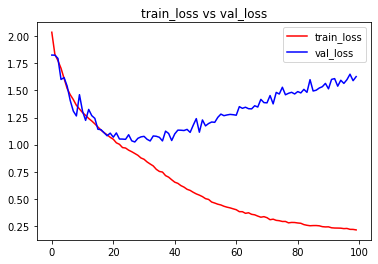

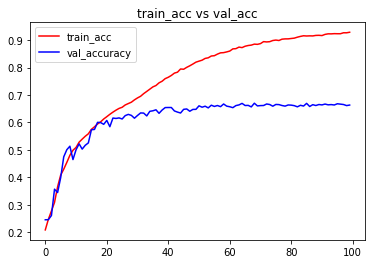

<Figure size 432x288 with 0 Axes>

In [ ]:
# visualizing losses and accuracy
%matplotlib inline
import matplotlib.pyplot as plt

train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_accuracy')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [ ]:
labels = ['anger','neutral','disgust','fear','happy','sadness','surprise']
from sklearn.metrics import confusion_matrix 
import matplotlib 
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    """
    The function is used to construct the confusion matrix 
    """
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(7,7))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,7):
        for j in range(0,7):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
y_prob=final_model.predict([X_test,X_test],batch_size=64,verbose=1)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_test]
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)
plt.show()

NameError: ignored

In [ ]:
names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']
import brewer2mpl
 
def plot_distribution2(y_true, y_pred):
    """
    The function is used to compare the number of true labels as well as prediction results
    """
    colorset = brewer2mpl.get_map('Set3', 'qualitative', 7).mpl_colors
    ind = np.arange(1.5,8,1)  # the x locations for the groups
    width = 0.35
    fig, ax = plt.subplots()
    true = ax.bar(ind, np.bincount(y_true), width, color=colorset, alpha=1.0)
    pred = ax.bar(ind + width, np.bincount(y_pred), width, color=colorset, alpha=0.3)
    ax.set_xticks(np.arange(1.5,8,1))
    ax.set_xticklabels(names, rotation=30, fontsize=14)
    ax.set_xlim([1.25, 8.5])
    ax.set_ylim([0, 60])
    ax.set_title('True and Predicted Label Count on CK+ ')
    plt.tight_layout()
    plt.show()
 
print(len(y_true))
print(len(y_pred)) 
plot_distribution2(y_true, y_pred)